# Objective:

Predict whether a customer will churn (i.e., stop using the service) based on their demographic, account, and service usage data.

# Dataset Overview
The typical telecom customer churn dataset contains the following columns:

Customer Demographics:
gender: Male or Female.

SeniorCitizen: Whether the customer is a senior citizen (binary).

Partner: Whether the customer has a partner (Yes/No).

Dependents: Whether the customer has dependents (Yes/No).
    
Account Information:

tenure: Number of months the customer has stayed with the company.

MonthlyCharges: The amount charged to the customer monthly.

TotalCharges: The total amount charged during the customer’s tenure.

Contract: Type of contract (Month-to-Month, One-Year, Two-Year).

PaymentMethod: Payment method (e.g., Credit card, Bank transfer, etc.).
    
Service Usage:

PhoneService: Whether the customer has phone service (Yes/No).

MultipleLines: Whether the customer has multiple lines (Yes/No).

InternetService: Type of internet service (DSL, Fiber optic, None).

Additional Services:

OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport.
StreamingTV, StreamingMovies.

Target Variable:

Churn: Whether the customer has churned (Yes/No)

# Data Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("Telco-Customer-Churn.csv")

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df['TotalCharges']=df["TotalCharges"].astype("float")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [15]:
df.duplicated().sum()

0

In [16]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return"no"
    
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)    

In [17]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


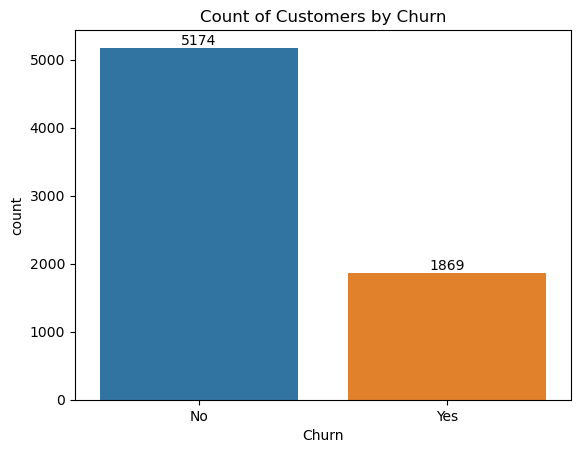

In [38]:
ax = sns.countplot(x = "Churn",data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

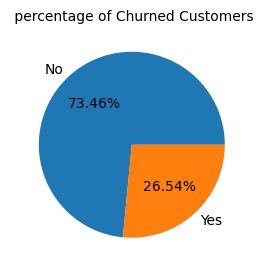

In [59]:
plt.figure(figsize = (3,4))
gb=df.groupby("Churn").agg({'Churn':"count"})
gb
plt.pie(gb["Churn"],labels=gb.index, autopct = "%1.2f%%" )
plt.title(" percentage of Churned Customers",fontsize=10)
plt.show()


#from the given pie chart we can conclude that 26.54% of our customers have churned out.
#now let's explore the reason behind it.

<function matplotlib.pyplot.show(close=None, block=None)>

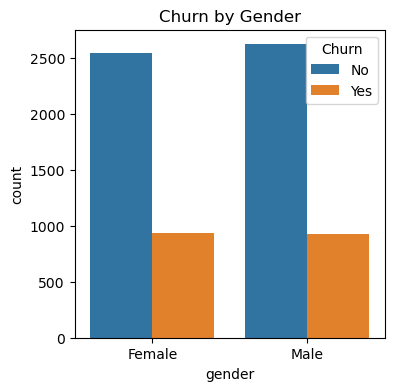

In [44]:
plt.figure(figsize=(4,4))
sns.countplot(x = "gender",data=df,hue="Churn")
plt.title("Churn by Gender")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

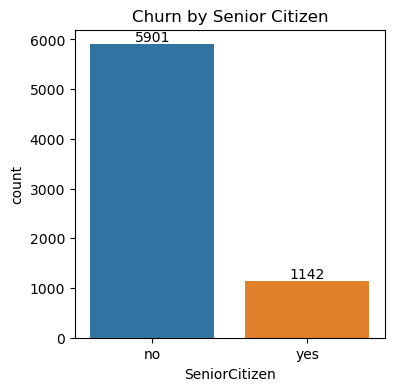

In [51]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x = "SeniorCitizen",data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customer  by Senior Citizen")
plt.show

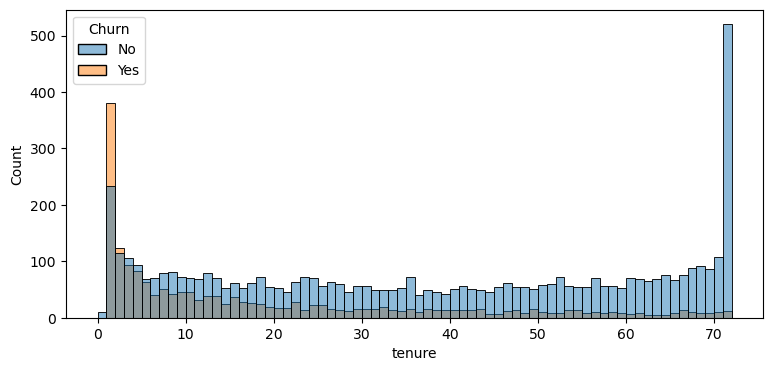

In [63]:
plt.figure(figsize = (9,4))
sns.histplot(x="tenure",data=df,bins=72,hue="Churn")
plt.show()

#people who have used to our services for a long time have stayed and people who have used our service 1 and 2 months have churned

<function matplotlib.pyplot.show(close=None, block=None)>

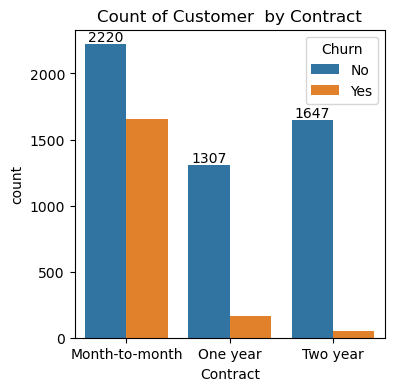

In [65]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x = "Contract",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customer  by Contract")
plt.show

#people who have month to month  contract are likely to churn then from who have 1 or 2 year or contract.

In [66]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

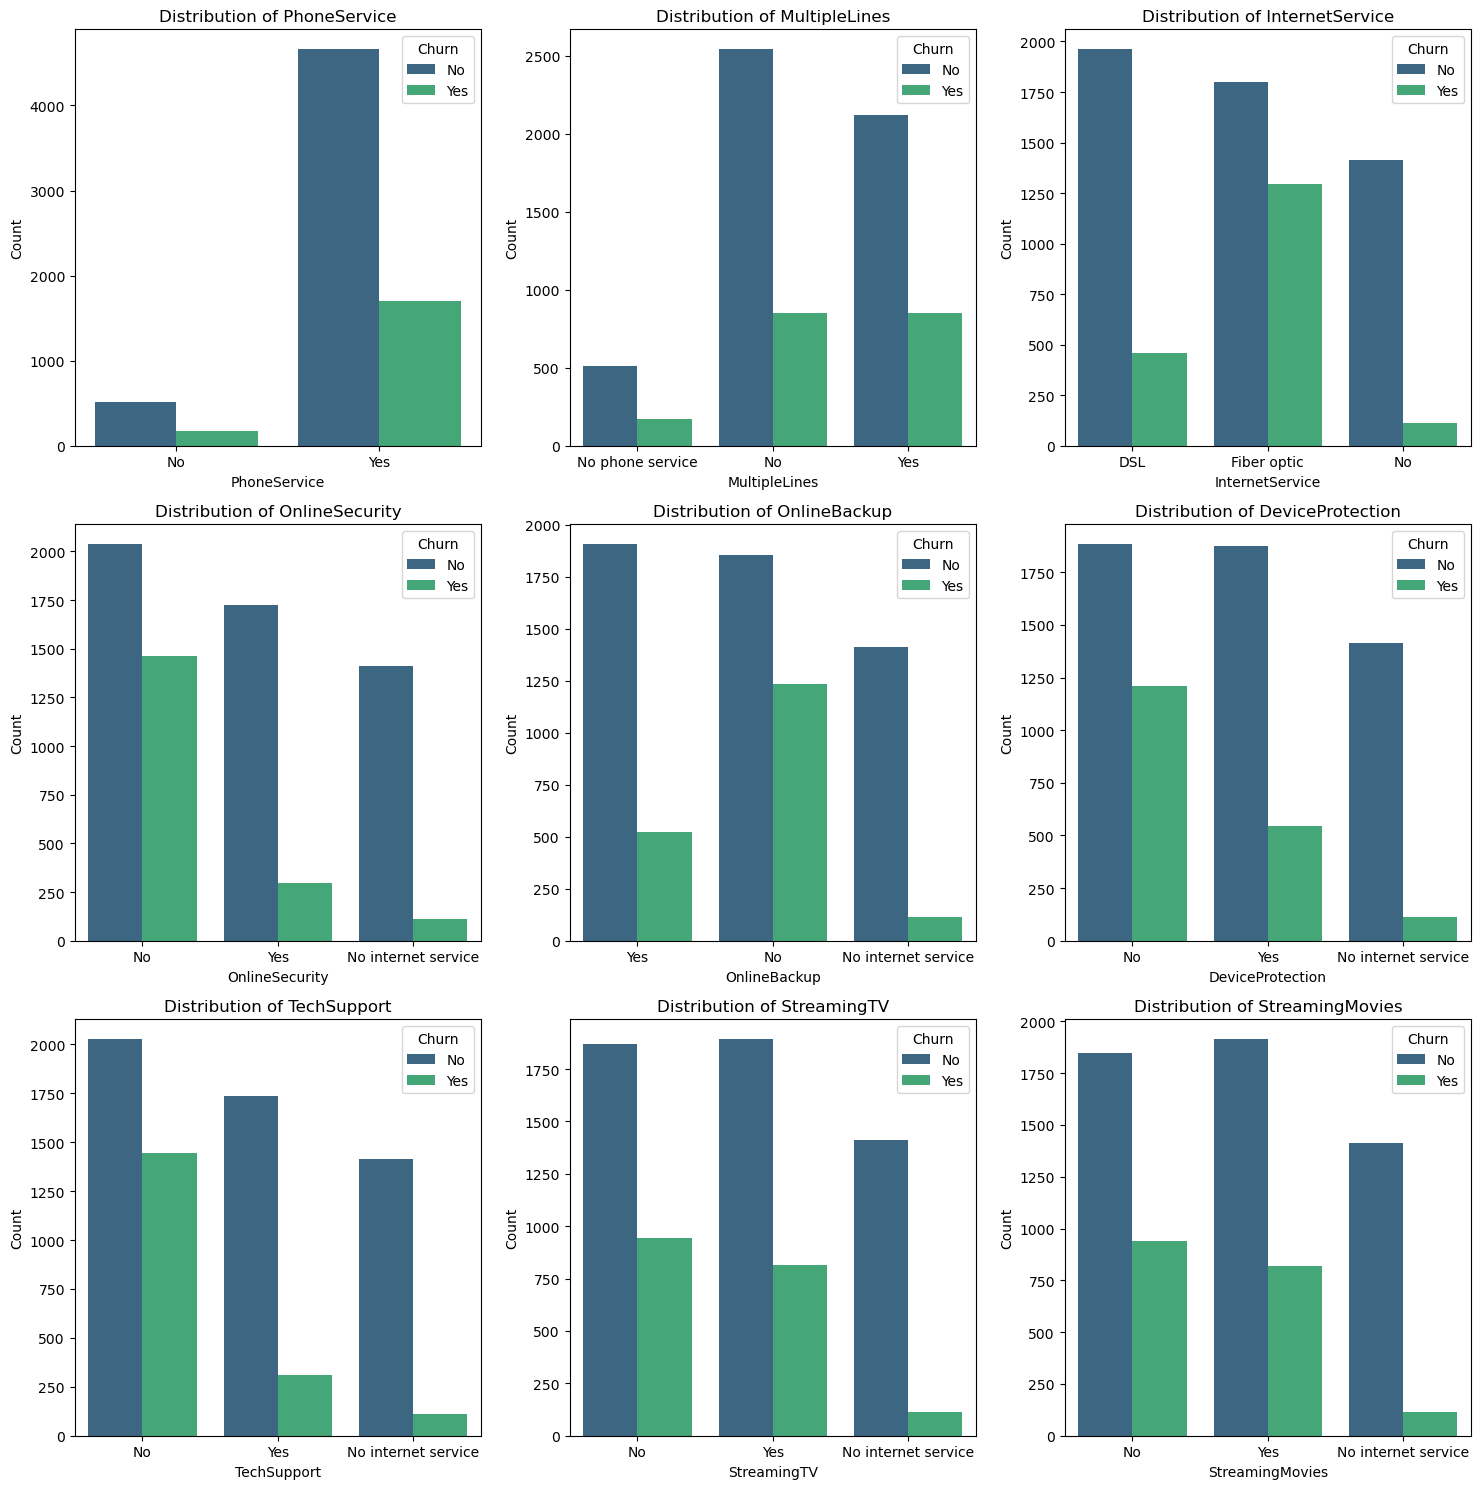

In [68]:
# Define the columns
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots
num_columns = len(columns)
rows = (num_columns + 2) // 3  # Number of rows (3 plots per row)
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 5))  # Adjust figsize for clarity

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot countplots for each column
for i, column in enumerate(columns):
    sns.countplot(x=column, data=df, ax=axes[i], palette="viridis",hue="Churn")
    axes[i].set_title(f"Distribution of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")

# Turn off unused subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


The majority of coustomers who do not churn tend to have services like PhoneService,InternetService and OnlineSecurityenabled for service like OnlineBackup,TechSupport,StreamingTV,churn rates are noticably higher when these service are not used or are unavailable.

<function matplotlib.pyplot.show(close=None, block=None)>

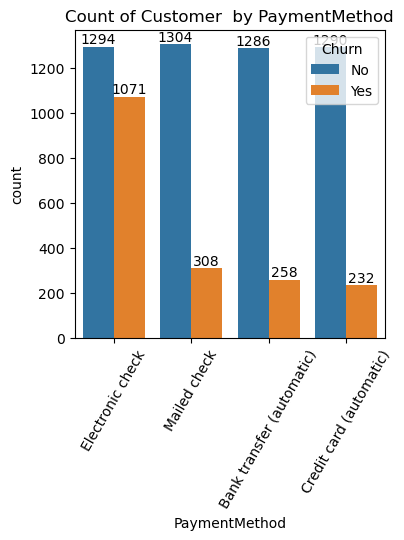

In [73]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x = "PaymentMethod",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Customer  by PaymentMethod")
plt.xticks(rotation=60)
plt.show

#costomer is likely to churn when he is using electronic check as a payment method.

# Insights and Recommendations
After evaluating the model and performing EDA:

Drivers of Churn:

Customers with month-to-month contracts churn more frequently.
Higher churn among customers with high MonthlyCharges and no add-on services like OnlineSecurity.
Recommendations:

Introduce loyalty discounts or incentives for month-to-month customers.
Promote add-on services to reduce churn rates for internet service users.
Target high-paying customers with personalized retention offers.